
Ten Key Insights:

1. Party with Highest Number of Seats (Won)
2. Party with Highest Total Candidates
3. Party with Narrowest Margin (Leading vs. Won)
4. Top 5 Parties by Total Candidates
5. Parties with Highest Percentage of Leading Candidates
6. Party with Highest Leading Seats
7. Party with the Highest Percentage of Won Seats
8. Party with the Highest Vote Share
9. Constituency with Highest Margin of Victory
10.Pie Chart
Enter 0 to exit


Enter your choice:  10


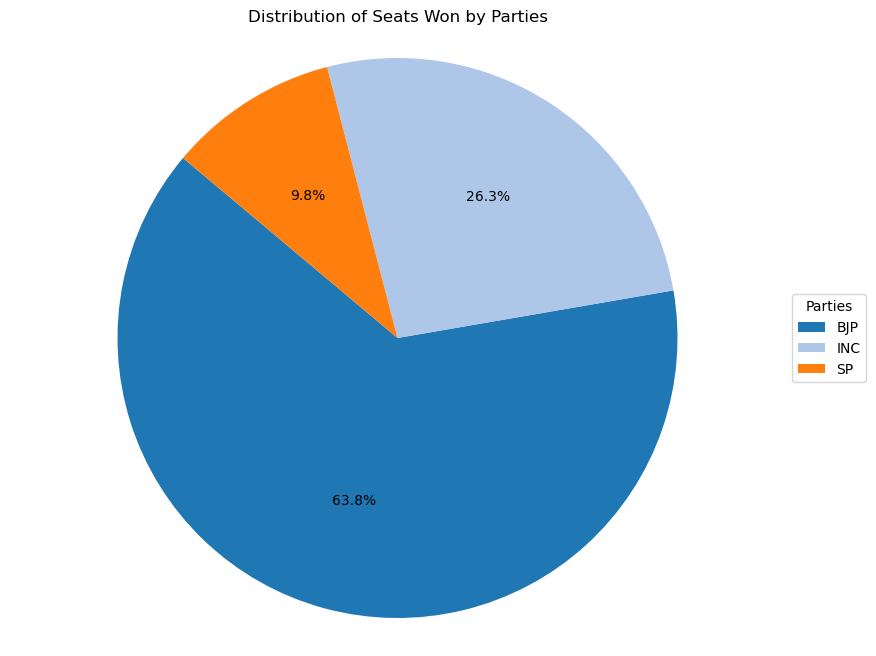

Pie Chart: None

Ten Key Insights:

1. Party with Highest Number of Seats (Won)
2. Party with Highest Total Candidates
3. Party with Narrowest Margin (Leading vs. Won)
4. Top 5 Parties by Total Candidates
5. Parties with Highest Percentage of Leading Candidates
6. Party with Highest Leading Seats
7. Party with the Highest Percentage of Won Seats
8. Party with the Highest Vote Share
9. Constituency with Highest Margin of Victory
10.Pie Chart
Enter 0 to exit


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('lok_sabha_results.csv')

# Additional insights functions
def party_with_highest_seats():
    # Convert 'Won' column to numeric, coercing errors to NaN
    df['Won'] = pd.to_numeric(df['Won'], errors='coerce')
    
    # Drop rows where 'Won' is NaN (if any)
    df.dropna(subset=['Won'], inplace=True)
    
    # Find the party with the highest number of seats won
    party_highest_seats = df.loc[df['Won'].idxmax()]['Party']
    
    return party_highest_seats


def party_with_highest_candidates():
    party_highest_candidates = df.loc[df['Total'].astype(int).idxmax()]['Party']
    return party_highest_candidates

def party_with_narrowest_margin():
    df['Margin'] = df['Won'].astype(int) - df['Leading'].astype(int)
    party_narrowest_margin = df.loc[df['Margin'].idxmin()]['Party']
    return party_narrowest_margin

def top_5_parties_by_candidates():
    top_5_candidates = df[['Party', 'Total']].sort_values(by='Total', ascending=False).head(5)
    return top_5_candidates

def parties_highest_percentage_leading():
    # Convert 'Leading' and 'Total' columns to numeric, coercing errors to NaN
    df['Leading'] = pd.to_numeric(df['Leading'], errors='coerce')
    df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
    
    # Drop rows where either 'Leading' or 'Total' is NaN
    df.dropna(subset=['Leading', 'Total'], inplace=True)
    
    # Calculate the percentage of leading candidates for each party
    df['Leading %'] = (df['Leading'] / df['Total']) * 100
    
    # Find parties with the highest percentage of leading candidates
    parties_highest_leading = df[['Party', 'Leading %']].sort_values(by='Leading %', ascending=False).head()
    
    return parties_highest_leading


def party_with_highest_leading():
    party_highest_leading = df.loc[df['Leading'].astype(int).idxmax()]['Party']
    return party_highest_leading

def party_highest_percentage_won():
    df['Won %'] = (df['Won'].astype(int) / df['Total'].astype(int)) * 100
    party_highest_won = df.loc[df['Won %'].idxmax()]['Party']
    return party_highest_won

def party_highest_vote_share():
    df['Vote %'] = (df['Won'].astype(int) / df['Total'].astype(int)) * 100
    party_highest_vote_share = df.loc[df['Vote %'].idxmax()]['Party']
    return party_highest_vote_share


import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame (replace this with your actual DataFrame)
data = {
    'Party': ['BJP', 'INC', 'SP'],
    'Won': [240, 99, 37]
}
df = pd.DataFrame(data)

def Pie_Chart():
    # Clean data: drop NaN values and convert 'Won' column to integers
    df_cleaned = df.dropna().astype({'Won': int})

    # Check if there are any NaN values left
    if df_cleaned['Won'].isnull().any():
        raise ValueError("There are NaN values in the 'Won' column.")

    colors = plt.cm.tab20.colors
    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(df_cleaned['Won'], autopct='%1.1f%%', startangle=140, colors=colors)
    plt.legend(wedges, df_cleaned['Party'], title='Parties', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title('Distribution of Seats Won by Parties')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()






# Menu loop for insights
while True:
    print()
    print("Ten Key Insights:")
    print()
    print("1. Party with Highest Number of Seats (Won)")
    print("2. Party with Highest Total Candidates")
    print("3. Party with Narrowest Margin (Leading vs. Won)")
    print("4. Top 5 Parties by Total Candidates")
    print("5. Parties with Highest Percentage of Leading Candidates")
    print("6. Party with Highest Leading Seats")
    print("7. Party with the Highest Percentage of Won Seats")
    print("8. Party with the Highest Vote Share")
    print("9. Constituency with Highest Margin of Victory")
    print("10.Pie Chart")

    print("Enter 0 to exit")

    choice = int(input("Enter your choice: "))
    
    if choice == 1:
        print("Party with Highest Number of Seats (Won):", party_with_highest_seats())
        
    elif choice == 2:
        print("Party with Highest Total Candidates:", party_with_highest_candidates())
        
    elif choice == 3:
        print("Party with Narrowest Margin (Leading vs. Won):", party_with_narrowest_margin())
        
    elif choice == 4:
        print("Top 5 Parties by Total Candidates:\n", top_5_parties_by_candidates())
        
    elif choice == 5:
        print("Parties with Highest Percentage of Leading Candidates:\n", parties_highest_percentage_leading())
        
    elif choice == 6:
        print("Party with Highest Leading Seats:", party_with_highest_leading())
        
    elif choice == 7:
        print("Party with the Highest Percentage of Won Seats:", party_highest_percentage_won())
        
    elif choice == 8:
        print("Party with the Highest Vote Share:", party_highest_vote_share())
        
    elif choice == 9:
        print("Constituency with Highest Margin of Victory:", constituency_highest_margin_victory())
    elif choice == 10:
        print("Pie Chart:", Pie_Chart())
    
    elif choice == 0:
        print("\n***************THANK YOU***************")
        break

    else:
        print("ENTER A VALID NUMBER!!!")
